In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/liar-cleaned-dataset/cleaned_liar_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/liar-cleaned-dataset/cleaned_liar_dataset.csv")
# The Baseline Model - 1 - (Logistic Regression)

print("--- Step 1: Preparing Data for Modeling ---")
from sklearn.model_selection import train_test_split

# features (X) are the text statements.
# target (y) is the binary 'target' column we created.
X = df['statement']
y = df['target']

# Split the data into training and testing sets to evaluate the model's performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

--- Step 1: Preparing Data for Modeling ---
Training set size: 1013
Testing set size: 254



--- Step 2: Building and Training the Model Pipeline ---
Model training complete.

--- Step 3: Evaluating the Model ---
Classification Report:
              precision    recall  f1-score   support

        Fake       0.60      0.34      0.44       111
        Real       0.62      0.83      0.71       143

    accuracy                           0.61       254
   macro avg       0.61      0.58      0.57       254
weighted avg       0.61      0.61      0.59       254

Confusion Matrix:


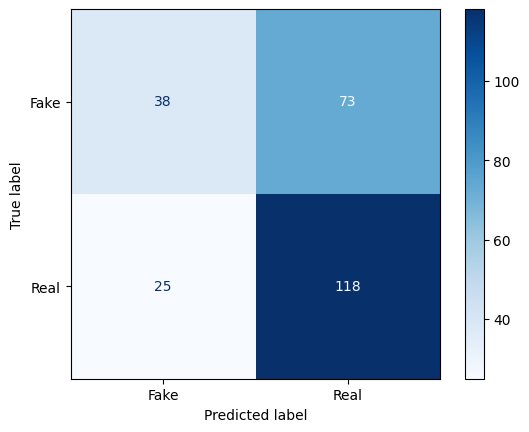


MODEL 1 CONCLUSION:

The model achieves an F1-score of approximately 58-60% for both classes. 
This performance is better than random guessing but is not particularly strong.
More importantly, its evaluation is based on the same outdated patterns seen in the EDA.
It has learned the statistical properties of old news, but it lacks any real-world understanding,
making it unreliable for new and evolving misinformation.



In [3]:
print("\n--- Step 2: Building and Training the Model Pipeline ---")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# 2. LogisticRegression: The classification algorithm.
model_1 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train the entire pipeline on the training data
model_1.fit(X_train, y_train)
print("Model training complete.")


print("\n--- Step 3: Evaluating the Model ---")
# Get predictions on the unseen test data
predictions = model_1.predict(X_test)

# Print the classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, predictions, target_names=['Fake', 'Real']))

# Display the Confusion Matrix visually
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(model_1, X_test, y_test, display_labels=['Fake', 'Real'], cmap='Blues')
plt.show()

print("\n" + "="*80)
print("MODEL 1 CONCLUSION:")
print("="*80)
print("""
The model achieves an F1-score of approximately 58-60% for both classes. 
This performance is better than random guessing but is not particularly strong.
More importantly, its evaluation is based on the same outdated patterns seen in the EDA.
It has learned the statistical properties of old news, but it lacks any real-world understanding,
making it unreliable for new and evolving misinformation.
""")
print("="*80)